In [1]:
import numpy as np 
import pandas as pd 
import scanpy as sc
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [11]:
PATH_TO_CHEN_ADATA      = '/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis_clean_data/adata_c.preprocessed.NanoMnT.TumorLabeled.h5ad'

PATH_TO_CHEN_METADATA   = '/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/AuthorProcessedData/GSE236581_CRC-ICB_metadata.txt.gz'
PATH_TO_CHEN_METADATA2  = '/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.MSI.CRC.woSD.run_meta.organized.tsv'
PATH_TO_CHEN_METADATA3  = '/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.patient_meta.csv'

DIRECTORY_OUT = '/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis_clean_data'

## Load data

In [20]:
adata_c = sc.read_h5ad(PATH_TO_CHEN_ADATA)

metadata_c  = pd.read_csv(PATH_TO_CHEN_METADATA, sep=' ')
metadata_c2 = pd.read_csv(PATH_TO_CHEN_METADATA2, sep='\t',)
metadata_c3 = pd.read_csv(PATH_TO_CHEN_METADATA3, )

dict_PatientID_to_TumorRegressionRatio = { list(tup)[1] : list(tup)[12] for tup in metadata_c3.itertuples() }
dict_PatientID_to_Response = { list(tup)[1] : list(tup)[13] for tup in metadata_c3.itertuples() }

adata_c.obs['TumorRegressionRatio'] = [ dict_PatientID_to_TumorRegressionRatio[PID] for PID in adata_c.obs['PatientID'] ]
adata_c.obs['Response'] = [ dict_PatientID_to_Response[PID] for PID in adata_c.obs['PatientID'] ]

## Compare MSI score between CR and PR patients (Fig. 4a)

In [27]:
MSI_intensity_by_Patient = list()
for PatientID, edf in adata_c.obs[(adata_c.obs['NumSTRLoci']>=10) & (adata_c.obs['Manual_CellType_lvl_1']=='Tumor epithelial')].groupby('PatientID', observed=True):
    MSI_intensity_by_Patient.append( [PatientID, np.mean(edf['MSI_score']), edf.iloc[0].Response] )
MSI_intensity_by_Patient = pd.DataFrame(MSI_intensity_by_Patient, columns=['PatientID', 'Mean_MSI_score', 'Response'])

/tmp/ipykernel_201291/1469949268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=MSI_intensity_by_Patient,


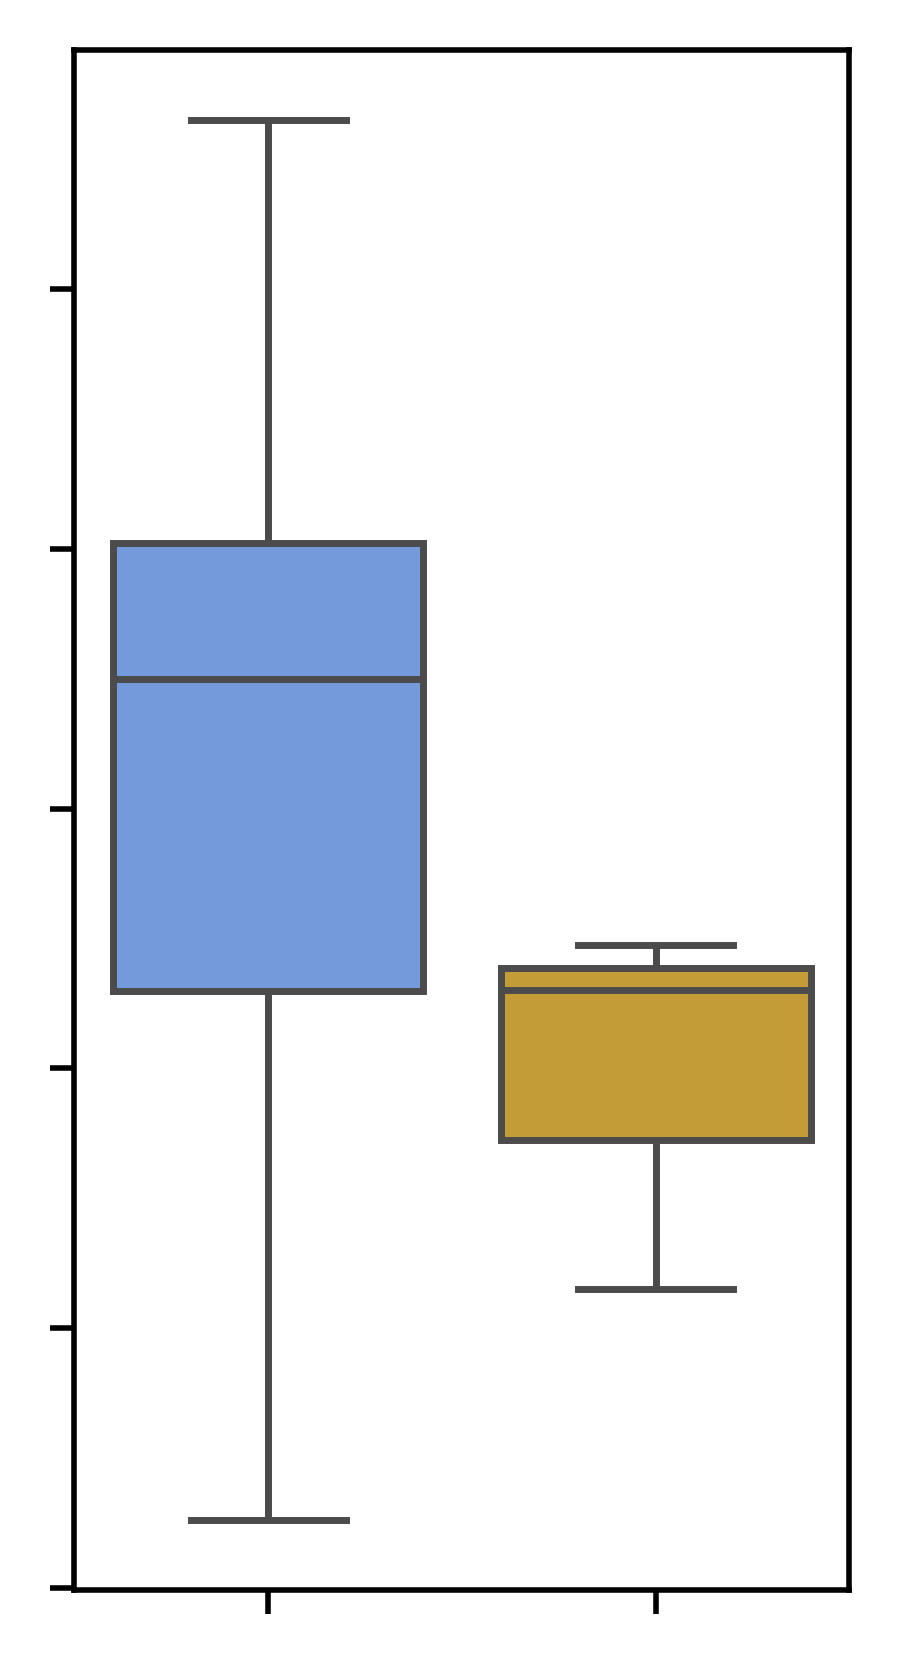

In [28]:
plt.figure(figsize=(2, 4), dpi=500)
ax = sns.boxplot(data=MSI_intensity_by_Patient, 
                 x='Response', y='Mean_MSI_score',  palette=['cornflowerblue', 'goldenrod'], 
                 whis=(0, 100))
# ax = sns.stripplot(data=STRProfileByLength2[STRProfileByLength2['isTumor']==True], x='Response', y='MSI_score', color='black',
#                    jitter=0, alpha=0.5,)
ax.set_xlabel('');
ax.set_ylabel('');
ax.set_xticklabels([]);
ax.set_yticklabels([]);
plt.show()